<a href="https://colab.research.google.com/github/trankha1655/CS114_ML/blob/main/CS114_ML/Colab%20Research/Bai_Tap_Colab_So_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DỰ ĐOÁN THỜI GIAN CHẠY CỦA CHƯƠNG TRÌNH (PREDICT EXECUTION TIME OF A PROGRAM)**

**Lớp CS114.L21**

**Nhóm**
1.   Trần Phan Nhật Kha - 19521655
2.   Trần Gia Nghĩa - 19521901
3.   Võ Tá Lâm - 19521744

**Nguồn tham khảo:**


1.   [Linear Regression](https://machinelearningcoban.com/2016/12/28/linearregression/)
2. [Overfitting](https://machinelearningcoban.com/2017/03/04/overfitting/)



**Data set:**


*   Data train: [data2](https://cs.uit.edu.vn/data2.txt)
*   Data test: [data3](https://cs.uit.edu.vn/data3.txt), [data4](https://cs.uit.edu.vn/data4.txt)


## **1. XỬ LÝ DỮ LIỆU:**

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Đọc dữ liệu 

In [89]:
#Mảng dùng để thiết lập tiêu đề của cột
column_title = ["Size", "Operations"]
#Đọc dữ liệu từ web
data_train = pd.read_csv("http://cs.uit.edu.vn/data2.txt", names = column_title)
data_test_1 = pd.read_csv("http://cs.uit.edu.vn/data3.txt", names = column_title)
data_test_2 = pd.read_csv("http://cs.uit.edu.vn/data4.txt", names = column_title)
#Xem thử tập dữ liệu huấn luyện 
print(data_test_2)

          Size  Operations
0     50142057     5.51836
1     65232531     7.18304
2     67683741     6.94395
3     59798449     5.48383
4     62297119     5.65503
...        ...         ...
6018  54062895     4.95203
6019  67529727     6.28587
6020  60771350     5.57836
6021  62607526     5.78302
6022  50888821     4.61823

[6023 rows x 2 columns]


In [90]:
#Chuyển đổi dữ liệu về tương thích với model linear regression
x_train = np.array([data_train['Size']]).T #input của data train
y_train = np.array(data_train['Operations']) #output của data train
x_test_1 = np.array([data_test_1['Size']]).T #input của data test thu nhat
y_test_1 = np.array(data_test_1['Operations']) #output của data test thu nhat
x_test_2 = np.array([data_test_2['Size']]).T #input của data test thu hai
y_test_2 = np.array(data_test_2['Operations']) #input của data test thu hai

Trực quan hóa dữ liệu huấn luyện


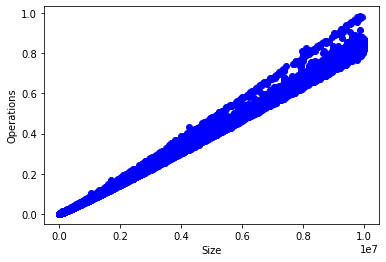

In [91]:
plt.plot(x_train, y_train,'bo')
plt.xlabel(column_title[0])
plt.ylabel(column_title[1])
plt.show()

## **2.TRAIN MODEL BẰNG MÔ HÌNH LINEAR REGRESSION**

In [92]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

Tạo và huấn luyện mô hình 

In [93]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Trực quan hóa kết quả dự đoán và kết quả thực tế

In [94]:
def visualization(axs, column_title , x, y):
  axs.plot(x, y, 'ro') # data 
  axs.plot(x, model.predict(x)) # the fitting line
  return axs

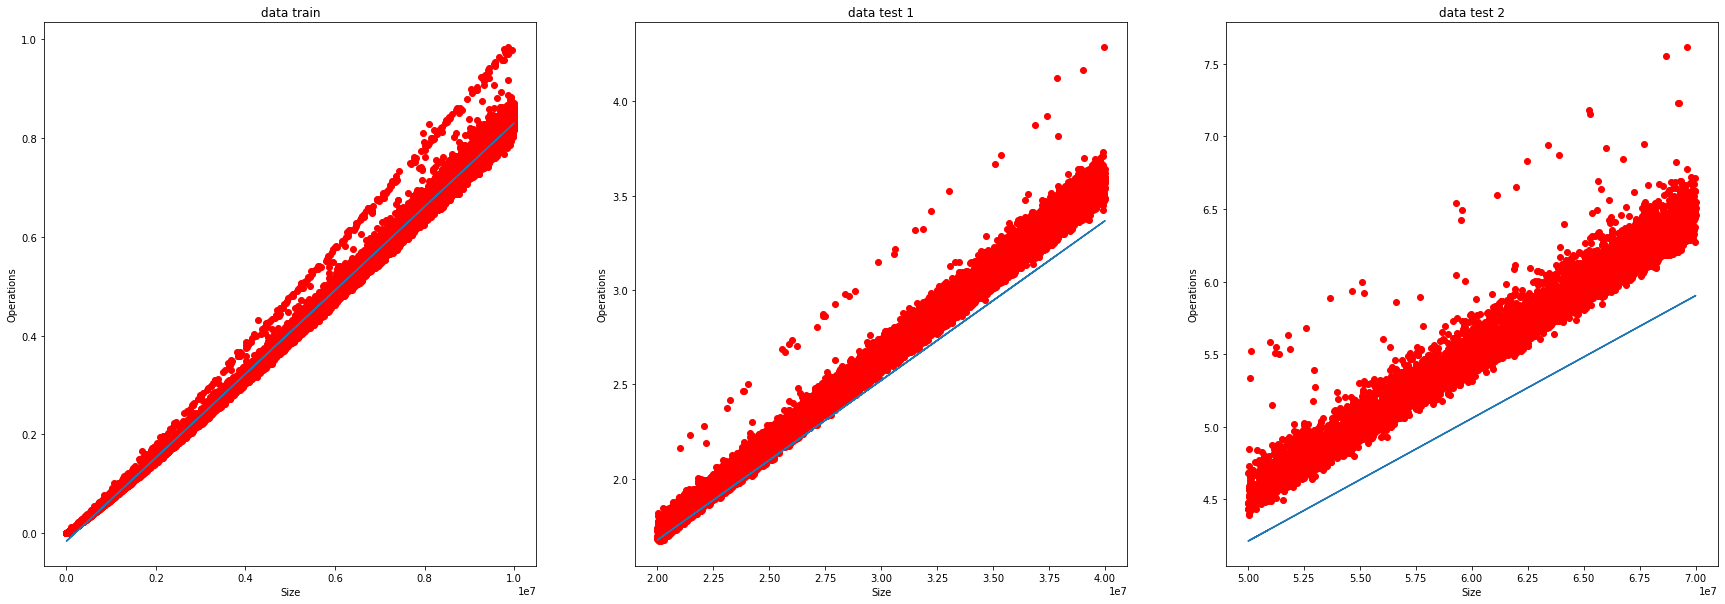

Mean squared error of data train (data2.txt):  0.00014337728721748835
Mean squared error of data test 1 (data3.txt):  0.020664949397549082
Mean squared error of data test 2 (data4.txt):  0.22348476817426036


In [95]:
fig, axs = plt.subplots(1,3,figsize = (30,10))

axs[0] = visualization(axs[0],column_title,x_train,y_train)
axs[0].set_title('data train')

axs[1] = visualization(axs[1],column_title,x_test_1,y_test_1)
axs[1].set_title('data test 1')

axs[2] = visualization(axs[2],column_title,x_test_2,y_test_2)
axs[2].set_title('data test 2')

for ax in axs.flat:
    ax.set(xlabel='Size', ylabel='Operations')

plt.show()

print("Mean squared error of data train (data2.txt): ", mean_squared_error(y_train, model.predict(x_train)))
print("Mean squared error of data test 1 (data3.txt): ", mean_squared_error(y_test_1, model.predict(x_test_1)))
print("Mean squared error of data test 2 (data4.txt): ", mean_squared_error(y_test_2, model.predict(x_test_2)))

**Kết luận:** Nhận thấy model hoạt động tốt đối với tập dự liệu huấn luyện (MSE xấp xỉ 0.00014) nhưng hoạt động rất tệ đối với 2 tập dữ liệu test (MSE tương đối lớn). Chứng tỏ model trên đã bị overfiting

## **3.PRE-PROCESSING DATA**

In [96]:
#Sources: Thầy An
#Hàm tăng số chiều dữ liệu 
def increaseDimension(X_):
  X = X_
  X = np.hstack((X, np.log2(X_)))
  X = np.hstack((X, X_*np.log2(X_)))
  X = np.hstack((X, X_*X_))
  return X

In [97]:
#Tăng chiều dữ liệu
x_train = increaseDimension(x_train)
x_test_1 = increaseDimension(x_test_1)
x_test_2 = increaseDimension(x_test_2)
#Hiển thị dạng dữ liệu dùng để train model
print(x_train)
print(y_train)

[[6.08369500e+06 2.25365164e+01 1.37105292e+08 3.70113449e+13]
 [1.95436700e+06 2.08982700e+01 4.08428892e+07 3.81955037e+12]
 [3.73418500e+06 2.18323620e+01 8.15260786e+07 1.39441376e+13]
 ...
 [9.83736400e+06 2.32298404e+01 2.28520395e+08 9.67737305e+13]
 [9.46659300e+06 2.31744139e+01 2.19382744e+08 8.96163830e+13]
 [4.08080100e+06 2.19604209e+01 8.96161077e+07 1.66529368e+13]]
[0.521842 0.152648 0.298548 ... 0.801394 0.776407 0.314468]


In [98]:
#train model
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Đưa ra MSE cho mỗi trường hợp


In [99]:
print("Mean squared error of data train (data2.txt): ", mean_squared_error(y_train, model.predict(x_train)))
print("Mean squared error of data test 1 (data3.txt): ", mean_squared_error(y_test_1, model.predict(x_test_1)))
print("Mean squared error of data test 2 (data4.txt): ", mean_squared_error(y_test_2, model.predict(x_test_2)))

Mean squared error of data train (data2.txt):  0.00012190225045388428
Mean squared error of data test 1 (data3.txt):  0.004181175138868819
Mean squared error of data test 2 (data4.txt):  0.01461965795175033
